# Homework 7 of ECON281 Computational

This file uses sequence method to solve NK model with capital.

Date: 05/20/2024

Author: Yi Zhou

Reference: ECON210C, Rupert and Sustek, 2019JME, On the Mechanics of New-Keynesian Models

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## NK model with Capital

<!-- We consider an NK model with capital but without cash and the monetary policy is based on the Taylor rule

Suppose we have the per-period utility function as
$$
u=\log c-\frac{l^{1+\eta}}{1+\eta}, \quad \eta \geq 0,
$$
and the intermediate goods aggregator
$$
y=\left[\int y(j)^{\varepsilon} d j\right]^{\frac{1}{\varepsilon}}, \quad \varepsilon \in(0,1),
$$



Rupert and Sustek (2019) shows that the equilibrium is characterized by the following
$$
\begin{gathered}
\frac{w_t}{c_t}=l_t^\eta \\
\frac{1}{c_t}=\beta E_t\left[\frac{1}{c_{t+1}}\left(\frac{1+i_t}{1+\pi_{t+1}}\right)\right] \\
\frac{1}{c_t}=\beta E_t\left[\frac{1}{c_{t+1}}\left(1+r_{t+1}-\delta\right)\right] \\
y_t=a_t k_t^\alpha l_t^{1-\alpha} \\
\frac{w_t}{r_t}=\frac{1-\alpha}{\alpha}\left(\frac{k_t}{l_t}\right) \\
\chi_t=\left(\frac{r_t}{\alpha}\right)^\alpha\left(\frac{w_t}{1-\alpha}\right)^{1-\alpha} \\
\pi_t=\Psi \left(\chi_t-\chi\right)+\beta E_t \pi_{t+1}, \\
i_t=v \pi_t+\xi_t, \\
y_t=c_t+k_{t+1}-(1-\delta) k_t
\end{gathered}
$$
where $r_t$ is capital rental rate, $i_t$ is the one-period nomial interest rate, $\chi_t$ is the real marginal cost, $\Psi=-\frac{1}{\phi(\varepsilon-1)}$ where $\phi$ is the Rotenberg cost parameter. Rotemberg specification is equivalent to Calvo specification, $\frac{(1-\theta)(1-\theta \beta)}{\theta}=-\frac{1}{\phi(\varepsilon-1)}$.

 



Assume there is no moneyart policy shock $\xi_t=0$ and we can log-linearize the equilibrium conditions into
$$
\begin{aligned}
& -\widehat{c}_t+\widehat{w}_t=\frac{\eta}{1-\alpha} \widehat{y}_t-\frac{\alpha \eta}{1-\alpha} \widehat{k}_t \\
& -\widehat{c}_t=-E_t \widehat{c}_{t+1}+\widehat{i}_t-E_t \pi_{t+1}, \\
& -\widehat{c}_t=-E_t \widehat{c}_{t+1}+E_t \widehat{r}_{t+1}, \\
& \widehat{l}_t=\frac{1}{1-\alpha} \widehat{y}_t-\frac{\alpha}{1-\alpha} \widehat{k}_t, \\
& \widehat{r}_t=\widehat{l}_t-\widehat{k}_t+\widehat{w}_t, \\
& \widehat{\chi}_t=\widehat{w}_t+\frac{\alpha}{1-\alpha} \widehat{y}_t-\frac{\alpha}{1-\alpha} \widehat{k}_t, \\
& \pi_t=\Psi \widehat{\chi}_t+\beta E_t \pi_{t+1}, \\
& i_t=v \pi_t+\xi_t, \\
& \widehat{y}_t=s_c \widehat{c}_t+\frac{1-s_c}{\delta} \widehat{k}_{t+1}-(1-\delta) \frac{1-s_c}{\delta} \widehat{k}_t 
\end{aligned}
$$

The equilibrium of NK model with capital is just the RBC model with capital adding the NK Philips Curve (NKPC) and Taylor rule. Also, we assume monetary policy shock is zero.
$$
\begin{aligned}
Y_t & =A_t N_t^{1-\alpha} K_{t-1}^\alpha \\
R_t^k & =\alpha A_t N_t^{-\alpha} K_{t-1}^\alpha \\
\frac{W_t}{P_t} & =(1-\alpha) A_t N_t^{-\alpha} K_{t-1}^\alpha \\
\frac{W_t}{P_t} & =\frac{\chi N_t^{\varphi}}{C_t^{-\gamma}} \\
Y_t & =C_t+I_t \\
1 & =\beta \frac{1+i_{t+1}}{1+\pi_{t+1}} \frac{C_{t+1}^{-\gamma}}{C_t^{-\gamma}} \\
1 & =\beta\left(R_{t+1}^k+1-\delta\right) \frac{C_{t+1}^{-\gamma}}{C_t^{-\gamma}} \\
K_t & =(1-\delta) K_{t-1}+I_t \\
\hat{\pi}_t & =\kappa\left(\hat{y}_t-\hat{y}_t^{f l e x}\right)+\beta E_t\left\{\hat{\pi}_{t+1}\right\} \\
\hat{i}_t & =\phi_\pi \hat{\pi}_t
\end{aligned}
$$


Then we log-linearize the model and write it into

$$
\textbf{H}_t(\textbf{Y}, \hat{a}) \equiv 
\begin{pmatrix}
\hat{a}_t + (1-\alpha)\hat{n}_{t} +\alpha \hat{k}_{t-1} - \hat{y}_t \\
\hat{a}_t + (1-\alpha)\hat{n}_{t} +(\alpha-1) \hat{k}_{t-1} - \hat{r}_t^k \\
 \hat{a}_t -\alpha\hat{n}_{t} +\alpha \hat{k}_{t-1} - (\hat{w}_t - \hat{p}_t )\\
\varphi \hat{n}_t + \gamma \hat{c}_t - (\hat{w}_t - \hat{p}_t )\\
s_c\hat{c}_t + (1-s_c)\hat{\iota}_t - \hat{y}_t\\
\hat{i}_{t+1} - \hat{\pi}_{t+1} - \gamma(\hat{c}_{t+1}-\hat{c}_t) \\
(1-\beta(1-\delta))\hat{r}_{t+1}^k -  \gamma (\hat{c}_{t+1} - \hat{c}_{t}) \\
 (1-\delta)\hat{k}_{t-1} + \delta\hat{\iota}_t - \hat{k}_t \\
 - \hat{\pi}_t + \kappa\left(\hat{y}_t-\hat{y}_t^{f l e x}\right)+\beta E_t\left\{\hat{\pi}_{t+1}\right\} \\
- \hat{i}_t + \phi_\pi \hat{\pi}_t
\end{pmatrix}
= \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{pmatrix},
\qquad t = 0, 1, \dots 
\tag{1}
$$
where $\textbf{Y} = \{\hat{c}, \hat{\iota}, \hat{k}, \hat{n}, \hat{y}, \hat{r}^k, \hat{w}-\hat{p}\}$ denotes the set of endogenous variables, and $\hat{a}$ is the only exogenous variable. 
-->

Use the three equations from ECON210C:

$$
\textbf{H}_t(\textbf{Y}, \hat{a}) \equiv 
\begin{pmatrix}
\hat{y_t}+\sigma[\hat{i_t}-\hat{\pi_{t+1}}]-\hat{y_{t+1}} \\
 \hat{\pi_t}-\kappa(\hat{y_t}-\hat{y_t^{flex}})-\beta \hat{\pi_{t+1}}\\
\hat{i_t}-\phi_{\pi} \hat{\pi_t}\\
\end{pmatrix}
= \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix},
\qquad t = 0, 1, \dots 
\tag{1}
$$
where $\textbf{Y} = \{\hat{y}, \hat{\pi}, \hat{i} \}$ denotes the set of endogenous variables, and $\hat{a}$ is the only exogenous variable, which determines $\hat{y_t^{flex}}$ through the equation $\hat{y_t^{flex}}=\frac{1+\varphi}{\gamma+\varphi} \hat{a_t}$


#### The NK DAG

The 3 equations of the NK model can be organized as three blocks which form a DAG in one unknown $\mathbf{U} = \mathbf{\hat{i}}$ and use IS curve as the target. 

1. IS Curve:
    - $\hat{y_t}=-\sigma [\hat{i_t}-\hat{\pi_{t+1}}]+\hat{y_{t+1}}$
2. Phillips Curve:
   - $\hat{\pi_t}=\kappa (\hat{y_t}-\hat{y_t^{flex}})+\beta \hat{\pi_{t+1}}$
3. Taylor Rule:
   - $\hat{i_t}=\phi_{\pi} \hat{\pi_t}$

The DAG captures the following logic: given $\mathbf{U} = \mathbf{\hat{i}}$ we can solve for $\mathbf{\hat{\pi}}$ in the Taylor rule block. Then given $\mathbf{\hat{\pi}}$, we solve for $\mathbf{\hat{y}}$ in the NKPC block. Finally, we verify that our sequences are consistent with market clearing in the market clearing block.

The image below shows a visualization of the DAG.


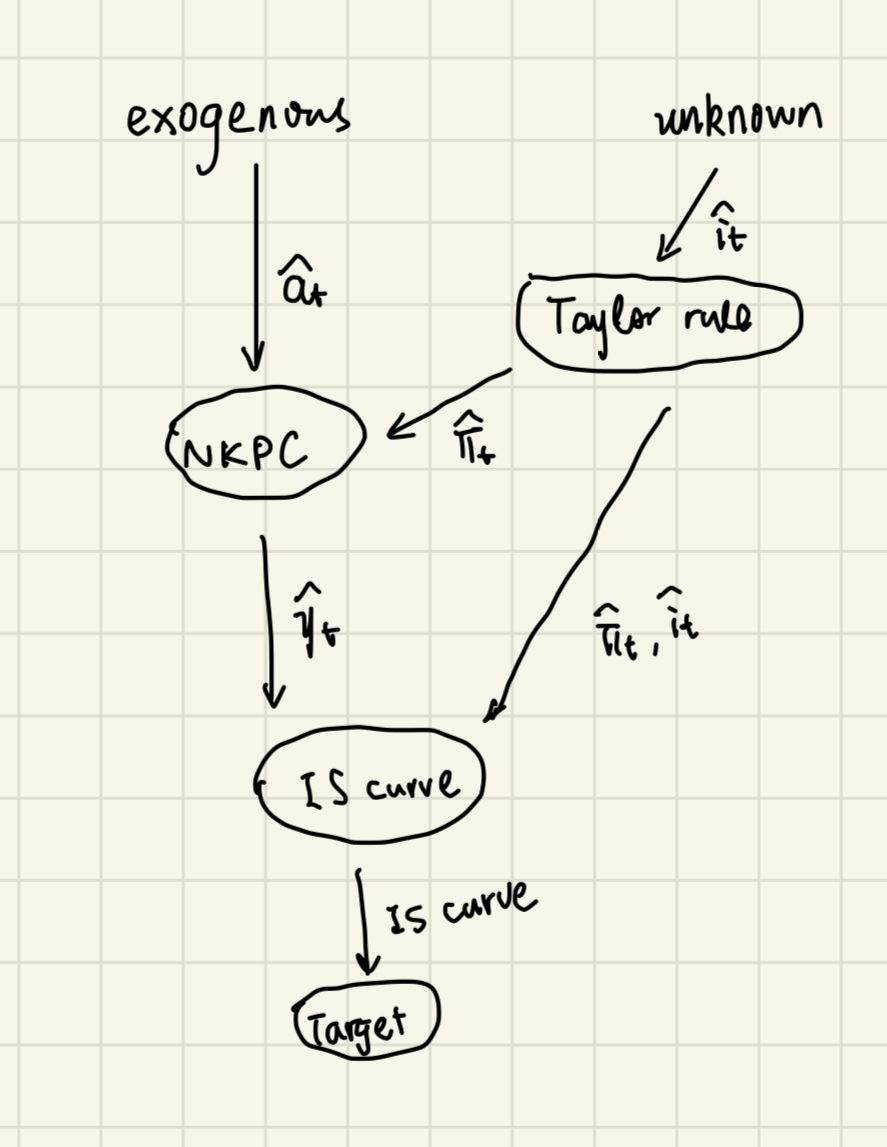

In [2]:
from IPython.display import Image

Image(filename='dag/NK_DAG.jpeg') 

In [3]:
# parameterization
gamma = 1
beta = 0.95
phi = 1
sigma=1
phipi=1.5
kappa=.5
T = 100

IS block and $\partial \mathbf{H}/ \partial \mathbf{Y}$

In [4]:
# define sparse identity, above-diagonal sparse matrix, below-diagonal sparse matrix, and zero matrix
I = sp.sparse.eye(T)
Ip1 = sp.sparse.diags([np.ones(T-1)], [1], (T, T))
Im1 = sp.sparse.diags([np.ones(T-1)], [-1], (T, T))
Z = sp.sparse.csr_matrix((T, T))

# IS block: IS curve
Phiisy = I - Ip1
Phiispi = -sigma*Ip1


# combine matrix blocks in a single sparse matrix with the following structure:
# [Phigmc Phigmy Phigmwp]
dHdY = sp.sparse.bmat([[Phiisy,Phiispi]])

assert dHdY.shape == (T, 2*T)

Taylor rule block and $\partial \mathbf{Y_f}/\partial \mathbf{U}$, $\partial \mathbf{Y_f}/ \partial \mathbf{Z}$

In [5]:
# Taylor rule block matrices: inflation
Phipii = 1/phipi *I
Phipia = Z


# combine firm matrices in the following format:
# [Phipii]

dYFdU = sp.sparse.bmat([[Phipii]
                       ])

# combine firm matrices in the following format:
# [Phipia]
dYFdZ = sp.sparse.bmat([[Phipia]
                       ])

assert dYFdU.shape == (T, T)
assert dYFdZ.shape == (T, T)

NKPC block and $\partial \mathbf{Y_h}/\partial \mathbf{U}$, $\partial \mathbf{Y_h}/ \partial \mathbf{Z}$

In [6]:
# household block matrix: labor supply
Phiypi = 1/kappa * I - beta/kappa * Ip1
Phiyi = Phiypi * Phipii
Phiya = (1+phi)/(gamma+phi) * I + Phiypi * Phipia

# combine household matrices in the following format:
# [Phiyi]
dYHdU = Phiyi

# combine household matrices in the following format:
# [Phiya]
dYHdZ = Phiya

assert dYHdU.shape == (T, T)
assert dYHdZ.shape == (T, T)

Stack the household block on top of the firm block to get $\partial \mathbf{Y} / \partial \mathbf{U}$ and $\partial \mathbf{Y} / \partial \mathbf{Z}$

In [7]:
# stack dYHdU on top of dYFdU to get dYdU
dYdU = sp.sparse.bmat([[dYHdU],
                      [dYFdU]])

# stack dYHdZ on top of dYFdZ to get dYdZ
dYdZ = sp.sparse.bmat([[dYHdZ],
                      [dYFdZ]])

assert dYdU.shape == (2*T, T)
assert dYdZ.shape == (2*T, T)

Derive IRFs

In [8]:
# compute dHdU using the chain rule dHdU = dHdY @ dYdU 
dHdU = dHdY @ dYdU 

# compute dHdZ using the chain rule dHdZ = dHdY @ dYdZ 
dHdZ = dHdY @ dYdZ

assert sp.sparse.issparse(dHdZ) == True
assert sp.sparse.issparse(dHdU) == True

assert dHdU.shape == (T, T)
assert dHdZ.shape == (T, T)

# compute the Jacobian of the model
dUdZ = - sp.sparse.linalg.spsolve(dHdU, dHdZ)
dYdZ = dYdU @ dUdZ + dYdZ

dXdZ = sp.sparse.bmat([[dUdZ],
                      [dYdZ]])

assert dUdZ.shape == (T, T)
assert dYdZ.shape == (2*T, T)
assert dXdZ.shape == (3*T, T)

/Users/yizhou/anaconda3/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:395: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/yizhou/anaconda3/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


Plot IRF for a MIT productivity shock

Text(0.5, 1.0, 'Inflation')

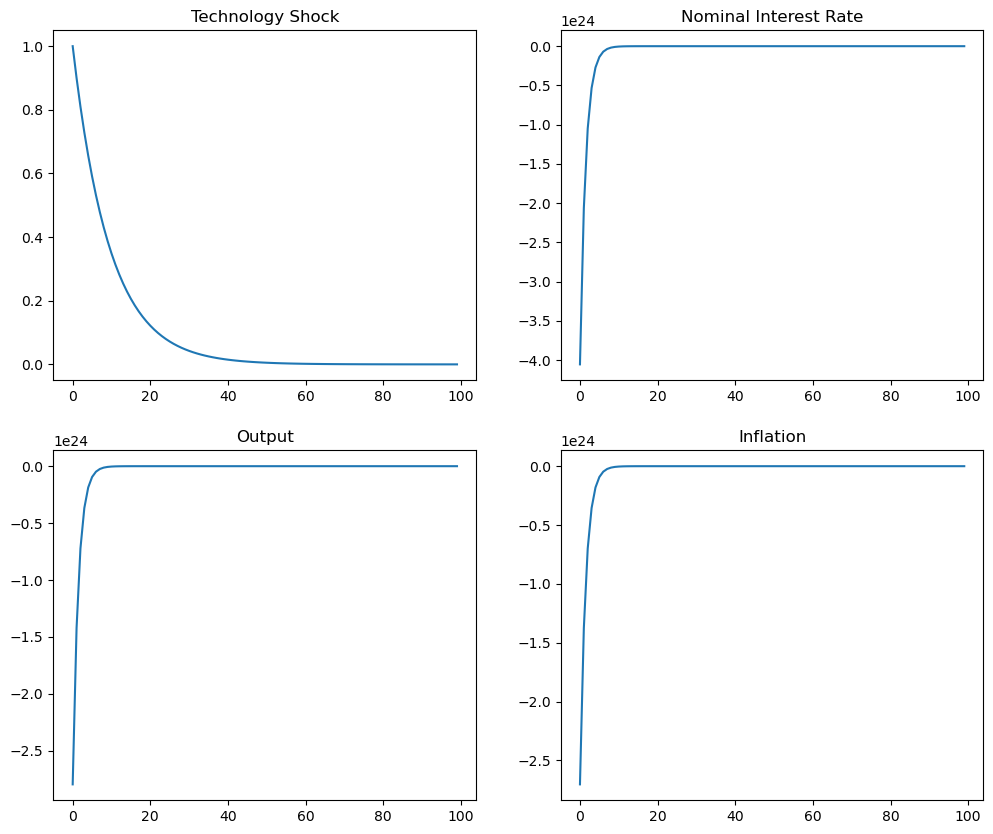

In [9]:
# plot IRFs to TFP shock with persistence rho
rho = 0.9
a = np.zeros((T, 1))
a[0] = 1
for t in range(1, T):
    a[t] = rho * a[t-1]

# compute impulse response functions
X = dXdZ @ a

# unpack X into its components 
i = X[0:T]
y = X[T:2*T]
pi = X[2*T:3*T]

    
# plot impulse response functions
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(a, label='a')
ax[0, 0].set_title('Technology Shock')
ax[0, 1].plot(i, label='i')
ax[0, 1].set_title('Nominal Interest Rate')
ax[1, 0].plot(y, label='y')
ax[1, 0].set_title('Output')
ax[1, 1].plot(pi, label='pi')
ax[1, 1].set_title('Inflation')
# plt.savefig('IRFs.png')

